In [20]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

import scienceplots
import time

import warnings
warnings.filterwarnings("ignore")

plt.style.use(['science', 'notebook', 'grid'])

In [6]:
# one-hot encoder
import torch.nn.functional as F
# data
from torch.utils.data import Dataset, DataLoader
import torchvision

Download from www.di.ens.fr/~lelarge/MNIST.tar.gz

In [8]:
x,y=torch.load("MNIST/processed/training.pt")
x.shape

torch.Size([60000, 28, 28])

In [9]:
y.shape

torch.Size([60000])

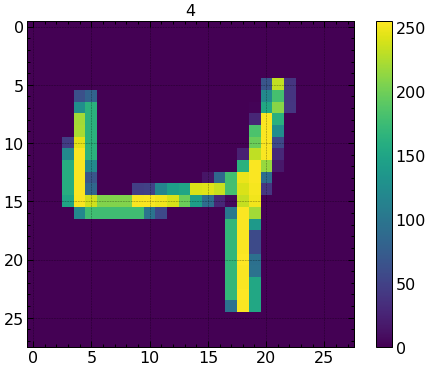

In [23]:
plt.imshow(x[2].numpy())
plt.title(y[2].numpy())
plt.colorbar()
plt.show()

In [30]:
y_original=torch.tensor([2,4,3,0,1])
y_new=F.one_hot(y_original)

y_new=F.one_hot(y,num_classes=10)
# Convenient for cross-entropy
y_new.shape

torch.Size([60000, 10])

In [32]:
x.view(-1,28**2).shape

torch.Size([60000, 784])

In [39]:
# dataset

class CTDataset(Dataset):
    def __init__(self,filepath):
        self.x,self.y=torch.load(filepath)
        self.x=self.x/255.
        self.y=F.one_hot(self.y,num_classes=10).to(float)
        
    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self,ix):
        return self.x[ix],self.y[ix]

In [40]:
train_ds=CTDataset("MNIST/processed/training.pt")
test_ds=CTDataset("MNIST/processed/test.pt")

In [42]:
len(train_ds)

60000

In [44]:
train_ds[0]

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

In [46]:
xs,ys=train_ds[0:4]
ys

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [48]:
train_dl=DataLoader(train_ds,batch_size=5)

for x,y in train_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([5, 28, 28])
torch.Size([5, 10])


In [50]:
len(train_dl)

12000

In [51]:
L=nn.CrossEntropyLoss()

In [56]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1=nn.Linear(28**2,100)
        self.Matrix2=nn.Linear(100,50)
        self.Matrix3=nn.Linear(50,10)
        self.R=nn.ReLU()
        
    def forward(self,x):
        x=x.view(-1,28**2)
        x=self.R(self.Matrix1(x))
        x=self.R(self.Matrix2(x))
        x=self.Matrix3(x)
        return x.squeeze()

In [57]:
f=MyNeuralNet()

In [58]:
xs.shape

torch.Size([4, 28, 28])

In [60]:
f(xs).shape

torch.Size([4, 10])

In [61]:
L(f(xs),ys)

tensor(2.3767, dtype=torch.float64, grad_fn=<DivBackward1>)

In [62]:
def train_model(dl,f,n_epochs=20):
    opt=SGD(f.parameters(),lr=0.01)
    L=nn.CrossEntropyLoss()
    
    losses=[]
    epochs=[]
    
    for epoch in range(n_epochs):
        print(f"Epoch{epoch}")
        N=len(dl)
        
        for i,(x,y) in enumerate(dl):
            opt.zero_grad()
            loss_value=L(f(x),y)
            loss_value.backward()
            opt.step()
            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
            
    return np.array(epochs),np.array(losses)

In [64]:
epoch_data,loss_data=train_model(train_dl,f)

Epoch0
Epoch1
Epoch2
Epoch3
Epoch4
Epoch5
Epoch6
Epoch7
Epoch8
Epoch9
Epoch10
Epoch11
Epoch12
Epoch13
Epoch14
Epoch15
Epoch16
Epoch17
Epoch18
Epoch19


Text(0.5, 1.0, 'Cross Entropy(Per batch)')

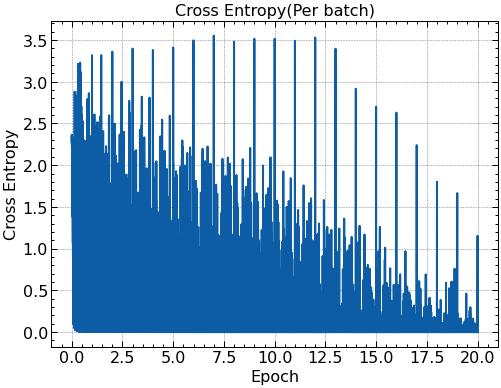

In [66]:
plt.plot(epoch_data,loss_data)
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy")
plt.title("Cross Entropy(Per batch)")

In [68]:
epoch_data.shape

(240000,)

In [67]:
epoch_data_avgd=epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avgd=loss_data.reshape(20,-1).mean(axis=1)

In [69]:
epoch_data_avgd.shape

(20,)

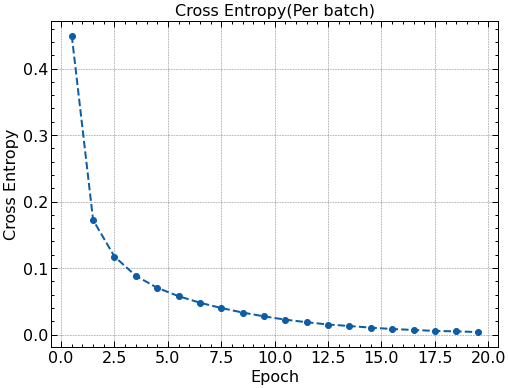

In [71]:
plt.plot(epoch_data_avgd,loss_data_avgd,"o--")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy")
plt.title("Cross Entropy(Per batch)")
plt.show()

In [74]:
y_sample=train_ds[0][1]
y_sample

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

In [76]:
x_sample=train_ds[0][0]
y_hat=f(x_sample)
y_hat

tensor([-10.2093,  -1.0455,   1.3159,  28.3739, -21.7315,  34.0864, -16.2465,
         -1.9389,  -6.5821,   0.3510], grad_fn=<SqueezeBackward0>)

In [79]:
torch.argmax(y_hat)

tensor(5)

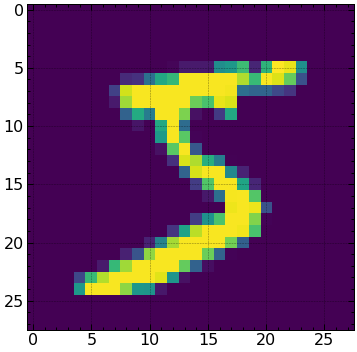

In [81]:
plt.imshow(x_sample)

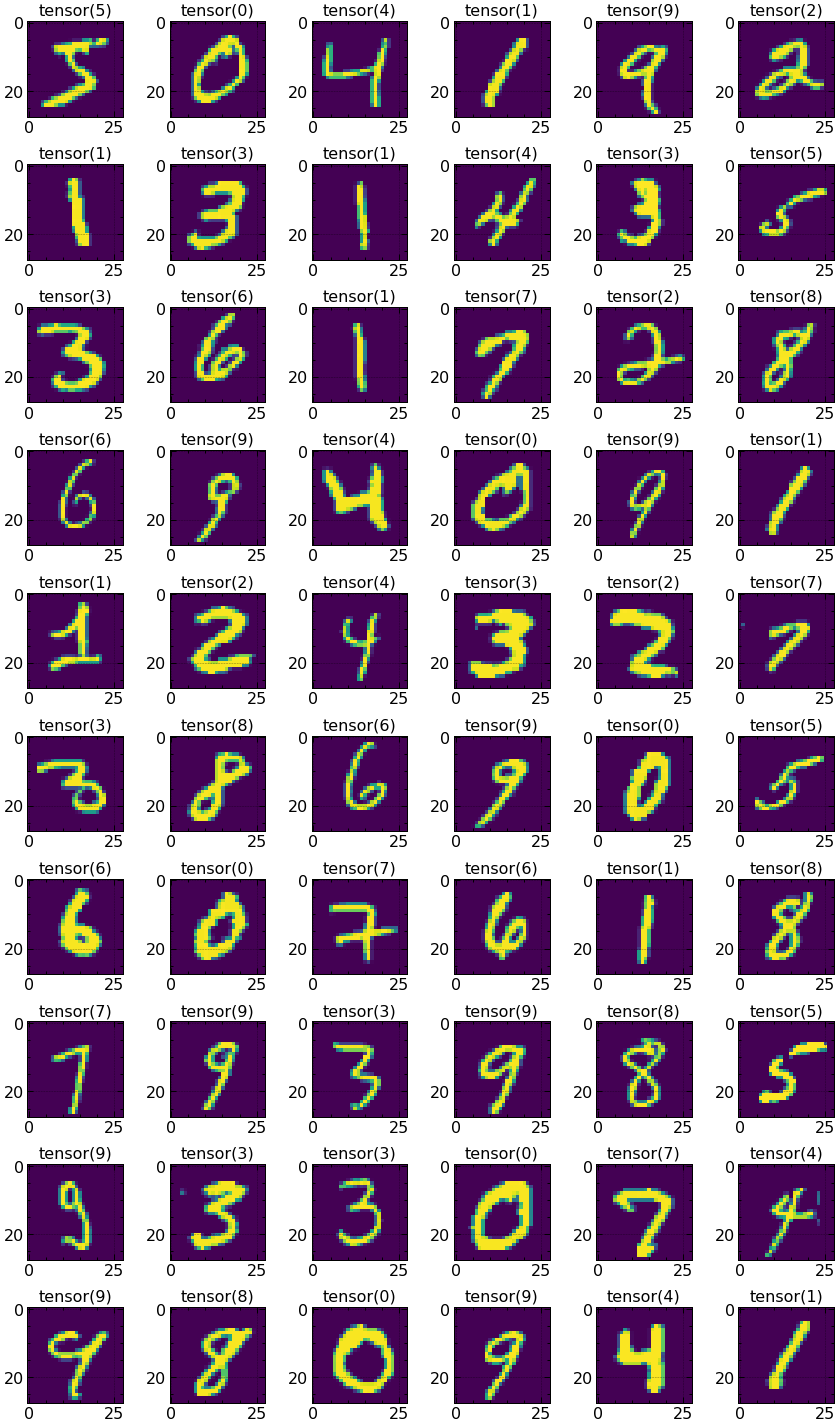

In [90]:
xs,ys=train_ds[0:200]
y_hats=f(xs).argmax(axis=1)

fig,ax=plt.subplots(10,6,figsize=(12,20))
for i in range(60):
    plt.subplot(10,6,i+1)
    plt.imshow(xs[i])
    plt.title(y_hats[i])
fig.tight_layout()
plt.show()

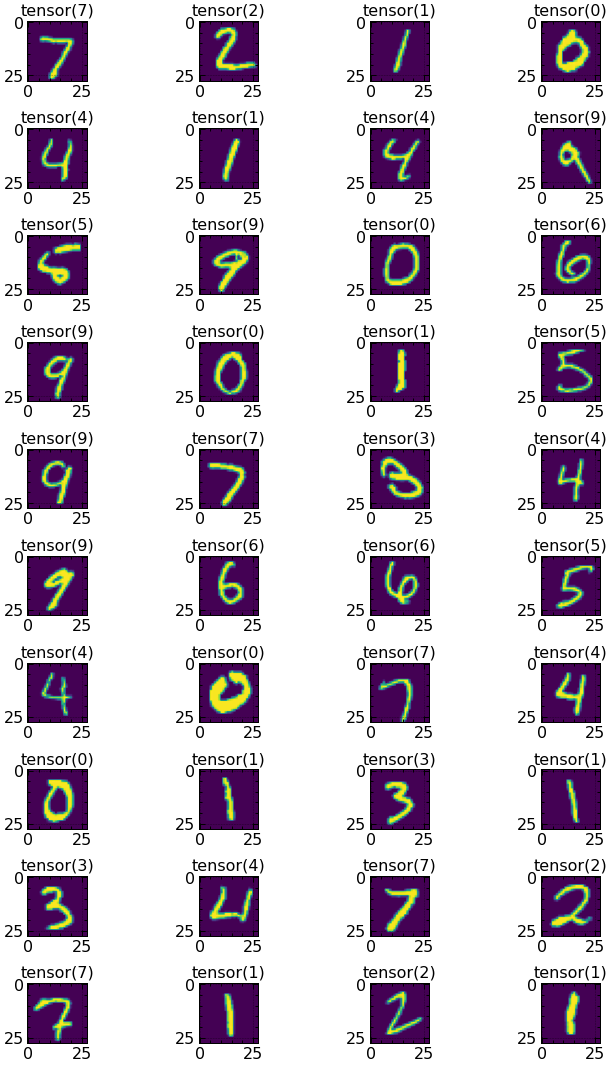

In [95]:
xs,ys=test_ds[:2000]
yhats=f(xs).argmax(axis=1)

fig,ax=plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    plt.title(yhats[i])
    
# https://blog.csdn.net/weixin_44225602/article/details/103189887
fig.tight_layout()
plt.show()